In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [12]:
df = pd.read_csv('/content/drive/MyDrive/woc/Polynomialdata_train.csv')
df1 = pd.read_csv('/content/drive/MyDrive/woc/Polynomialdata_test.csv')
x_train=np.array(df.iloc[0:35000,1:], dtype="float32")
y_train=np.array(df.iloc[0:35000,0:1], dtype='float32')
x_test=np.array(df.iloc[35000:,1:], dtype="float32")
y_test=np.array(df.iloc[35000:,0:1], dtype='float32')
x_train.shape

(35000, 3)

#**Implementation:**
<ul>
<li>Created a Class PolReg</li>
<li>Defined degree,learning rate(&alpha;),iterations, &lambda;1
and &lambda;2 using init method</li>
<li>Defined a Normalize function using the below formula</li>
<li>Defined a Train function for training the model using the below listed formulae</li>
<li>Defined Predict function to make prediction and calculate error</li>

$$f(\overset{\rightarrow}{w)} = \overset{\rightarrow}{w} \cdot \overset{\rightarrow}{x}$$
$$where\ x \ is\ the\ polynomial\ of\ combination\ of\ all\ features\ raised\ to\ powers\ upto\ degree\ and\ w\ is\ the\ weights\ vector$$
###Normalization:
$$x_i = \frac{{x_i - \mu}}{{\sigma}}$$
###Cost Function:
$$ J = \frac{1}{2m} ( \sum_{i=1}^{m} \left( x \cdot w - y \right)^2 + \alpha_{reg} \lambda_1 \sum_{j=1}^{n} \left| w_j \right| + (1 - \alpha_{reg}) \lambda_2 \sum_{j=1}^{n} w_j^2 ) $$<br>
#####With **Lasso** and **Ridge** Regression respectively.<br>

###Gradient:
$$ \frac{\partial J}{\partial w} = \frac{1}{m} \left( x_i \cdot (x_i \cdot w - y) + \alpha_{\text{reg}} \lambda_1 \cdot \text{sign}(w) + (1 - \alpha_{\text{reg}}) \lambda_2 \cdot w \right) $$  <br>

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (x \cdot w - y) $$
###Gradient Descent:
$$w_i = w_i - \alpha \frac{\partial J}{\partial w_i}$$

$$b = b - \alpha \frac{\partial J}{\partial b}$$












In [48]:
class PolReg:
  def __init__(self,degree,alpha,iterations,lambda1,lambda2):
      self.degree=degree
      self.alpha=alpha
      self.iterations=iterations
      self.lambda1=lambda1
      self.lambda2=lambda2
  def Normalize(self,x):
      self.sigma=np.std(x,axis=0)
      self.mu=np.mean(x,axis=0)
      X=(x-self.mu)/(self.sigma)
      return X
  def Polymerize(self,x):
      m=x.shape[0]      ##samples
      n=x.shape[1]      ##features
      X=np.ones((m,1))
      #Every combination of raising features to powers less than self.degree
      for i in range(1,self.degree+1):
          for j in range(n):
            X=np.concatenate((X,(x[:,j]**i).reshape(-1, 1)),axis=1)

      return X
  def Train(self,x,y,a_reg):
      x=self.Normalize(x)
      X=self.Polymerize(x)
      self.a_reg=a_reg
      m=X.shape[0]      ##samples
      n=X.shape[1]      ##features
      self.w=np.random.rand(n,1)*np.sqrt(2/n)  #He initialization
      J_change=[]
      for i in range(self.iterations):
          J=1/(2*m)*np.sum((np.dot(X,self.w)-y)**2+(self.a_reg)*self.lambda1*np.sum(abs(self.w))+(1-self.a_reg)*self.lambda2*np.sum((self.w)**2))
          J_change.append(J)
          f=np.dot(X,self.w)-y
          dl1=self.a_reg*self.lambda1*np.sign(self.w)
          dl1[0]=0
          dl2=(1-self.a_reg)*self.lambda2*self.w
          dl2[0]=0
          gradients = np.dot(X.T, f) + dl1 + dl2

          self.w -= (1/m)*(self.alpha)*gradients
      for i in range(self.iterations):
          if i%500==0:
             print(f"Cost after {i}th iteration is: {J_change[i]}")
      print(f"cost after {self.iterations}th iterations is: {J_change[-1]}")
      #print(len(J_change))
      plt.figure(figsize=(4,3))
      plt.plot(np.arange(self.iterations),J_change,'r')
      plt.xlabel("Iterations")
      plt.ylabel("Cost Function (J)")
  def Predict(self,x):
      x=self.Normalize(x)
      X=self.Polymerize(x)
      Y=np.dot(X,self.w)
      return Y
  def R2score(self,x,y):
      y_pred = self.Predict(x)
      rss = np.sum((y_pred-y)**2)
      tss = np.sum((y-np.mean(y))**2)
      r2 = 1 - (rss)/(tss)
      return print(f'R2_score :{r2}')

In [49]:
p=PolReg(4,0.003,5000,0.1,0.1)

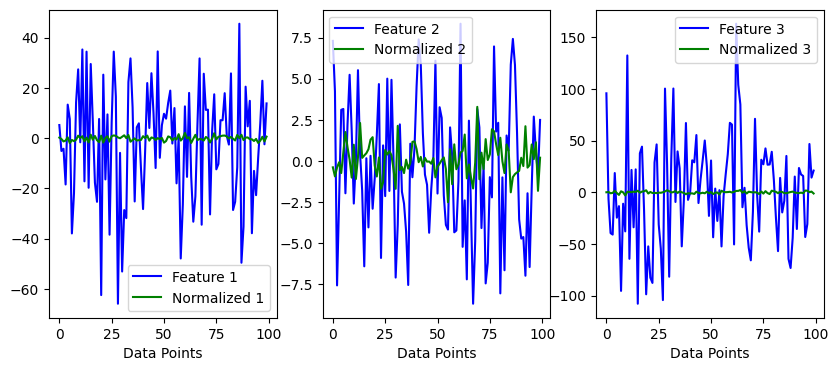

In [11]:
plt.figure(figsize=(10, 4))
for i in range(x_train.shape[1]):
    plt.subplot(1,3,i+1)
    plt.plot(x_train[:100, i],label=f'Feature {i+1}',color='blue')
    plt.plot(p.Normalize(x_test)[:100,i],label=f'Normalized {i+1}',color='green')
    plt.xlabel('Data Points')
    plt.legend()
plt.show()

Cost after 0th iteration is: 64766983955491.96
Cost after 500th iteration is: 24433182242887.12
Cost after 1000th iteration is: 24200789417445.387
Cost after 1500th iteration is: 24187132590102.98
Cost after 2000th iteration is: 24202136706493.64
Cost after 2500th iteration is: 24214728286307.273
Cost after 3000th iteration is: 24222650499001.24
Cost after 3500th iteration is: 24227471244428.965
Cost after 4000th iteration is: 24230500159408.074
Cost after 4500th iteration is: 24232496299881.65
cost after 5000th iterations is: 24233867535713.26
R2_score :0.6145585318897964


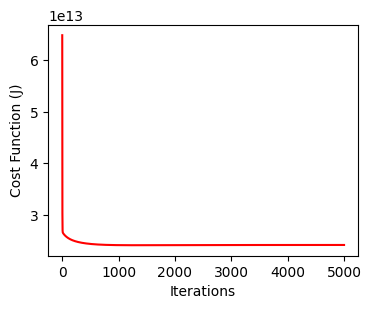

In [50]:
p.Train(x_train,y_train,0.15)
p.Predict(x_test)
p.R2score(x_test,y_test)

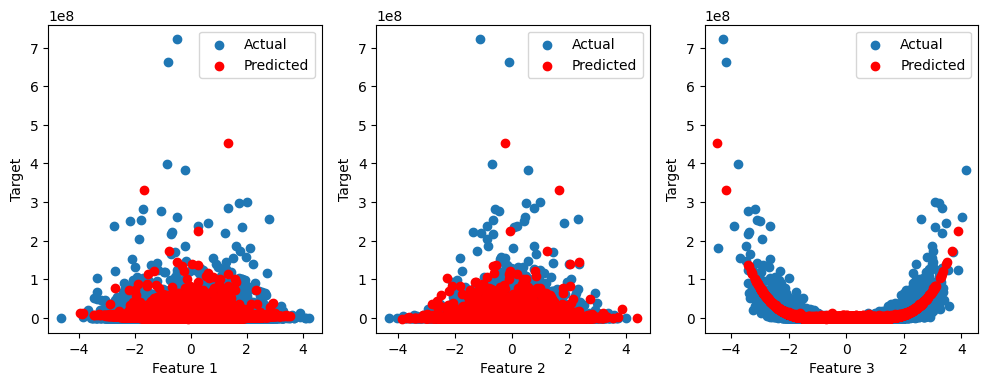

In [51]:
y_pred = p.Predict(x_test)
x_train=p.Normalize(x_train)
x_test=p.Normalize(x_test)
plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.scatter(x_train[:, i], y_train, label='Actual')
    plt.scatter(x_test[:, i], y_pred,marker='o', color='r', label='Predicted')
    plt.xlabel(f"Feature {i+1}")
    plt.ylabel("Target")
    plt.legend()

plt.show()
